## Read data from local file

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv("../data/raw/nyx_taxi_dataset.csv")
df.head()

,vendorID,lpepPickupDatetime,passengerCount,tripDistance,pickupLongitude,pickupLatitude,dropoffLongitude,dropoffLatitude,totalAmount
0,2,1.421107e+09,1,2.99,-73.828384,40.755535,-73.788582,40.744549,12.80
1,2,1.420135e+09,1,1.17,-73.949783,40.806915,-73.962090,40.805336,7.80
2,2,1.422013e+09,1,1.46,-73.958611,40.678764,-73.981522,40.684853,11.16
3,1,1.422581e+09,2,1.90,-73.963799,40.710602,-73.986931,40.719414,9.30
4,1,1.421074e+09,1,0.80,-73.925430,40.761757,-73.916878,40.764236,6.30


## Split Data

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="totalAmount")
y = df["totalAmount"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0
)

## Train Model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression().fit(X_train, y_train)

In [43]:
model.coef_

array([ 7.48582526e-02,  7.60709179e-08, -1.35532811e-02,  3.25743992e+00,
       -3.86009746e+00,  6.16098801e+00, -6.47178718e+00, -1.18864149e+01])

## Evaluate Model

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
y_test_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

11.87873676897321
0.87404086072894


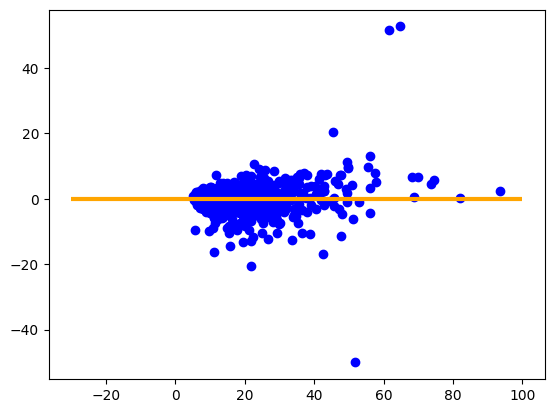

In [48]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_pred - y_test, marker="o", color="blue")
plt.hlines(y=0, xmin=-30, xmax=100, linewidth=3, color="orange")
plt.show()